## Global Power Plant Database

**Problem Statement:**

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
*`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
*`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
*'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
*`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
*`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
*`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
*`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data frame
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
# show all columns in a dataframe
pd.set_option('display.max_columns', None) 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#to check column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
# #to get info about the data shape,data type of individual columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The dataframe have 27 columns and 907 rows. 12 columns have object and 15 float data type. Null values are also present in the dataset.

In [5]:
# null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

* other_fuel3, wepp_id and estimated_generation_gwh has all NaN values keeping all the values in a column as NaN has no    meaning so i can drop these 3 columns.
* other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [6]:
#to check for duplicate values
df.duplicated().sum()

0

In [7]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)
df = df.drop(["generation_gwh_2013"],axis= 1)
df = df.drop(["generation_gwh_2019"],axis=1)

In [8]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are same so no need to keep all these columns unnecessarily.

In [9]:
#Droping unnecessary columns
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [10]:
# to check for categorical columns
obj_columns = [] 

for i in df.dtypes.index:
    if df.dtypes[i] == "O":
        obj_columns.append(i)
obj_columns     

['name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'owner',
 'source',
 'url',
 'geolocation_source']

In [11]:
# listing all Categorical data using for_loop method
for x in obj_columns:
    print(x)
    print(df[x].value_counts())
    print("-"*70)

name
NIZAM SAGAR                    1
Gulabpura Solar Power Plant    1
PARBHANI GANGAKHED             1
UKAI_Coal                      1
ANPARA                         1
                              ..
SONE WEST CANAL                1
ANOOPGARH ST I&II              1
TAGO                           1
DUGGAVATHI MILL                1
KUTTIADI                       1
Name: name, Length: 907, dtype: int64
----------------------------------------------------------------------
gppd_idnr
IND0000263    1
IND0000474    1
IND0000278    1
IND0000002    1
WRI1026792    1
             ..
IND0000248    1
WRI1026177    1
WRI1026351    1
IND0000230    1
WRI1019944    1
Name: gppd_idnr, Length: 907, dtype: int64
----------------------------------------------------------------------
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
---------------------------------------------------------

* Name column has all unique values. Name column will not contribute any thing in my model training.So let me drop it.
* gppd_idnr also has all the values unique so let me drop it as it can not contribute to model training.
* Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column.
* url column also has no input for prediction ao i can this column as well.

In [12]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [13]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)


Extracted Power_plant_age column from commissioning_year column and droped commissioning_year. As Power_plant_age may contribute more than commissioning_year for our prediction.

In [14]:
df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.7745,626.239128,14.0


In [15]:
df.shape

(907, 13)

In [16]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
Power_plant_age        380
dtype: int64

In [17]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [18]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

 Replaced all the null values in all columns.

In [19]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.20545,817.97725,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.20545,817.97725,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.20545,817.97725,751.644375,17.0


In [20]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

All null values have been removed from the dataset.

In [21]:
df.shape

(907, 13)

In [22]:
#Checking unique values of target column (for regression model)
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [23]:
#Checking unique values of target column (for classification model)
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [24]:
#Checking description of data set
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


* There is a huge difference in mean and 2nq quantile of capacity_mw column which means there are extream outliers in the column.
* Mean and 2nd quantile all other columns are almost same.
* Mean of generation_gwh_2017 is high compared to other columns which means the power production is high in 2017.

In [25]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [26]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


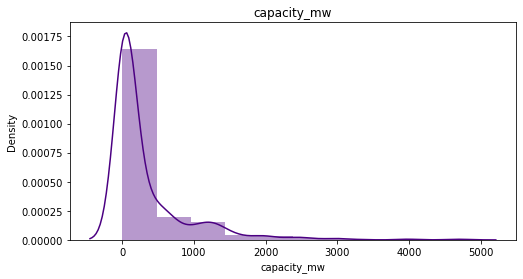

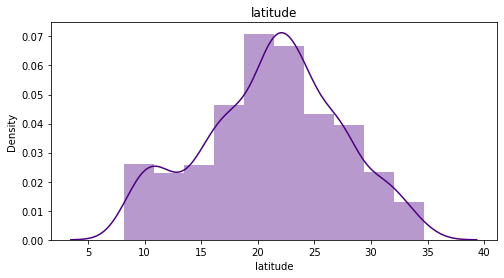

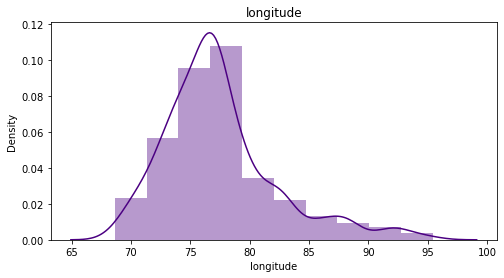

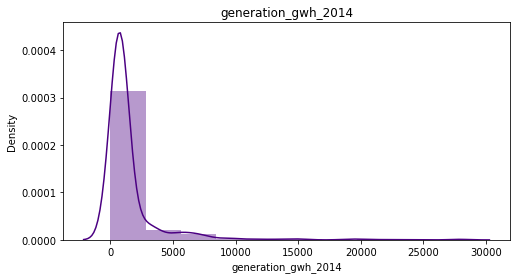

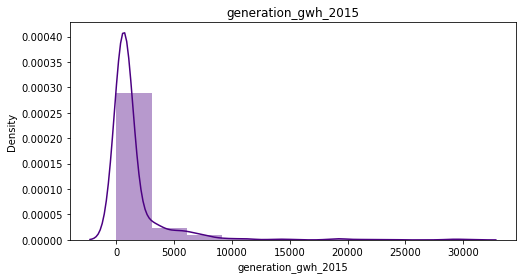

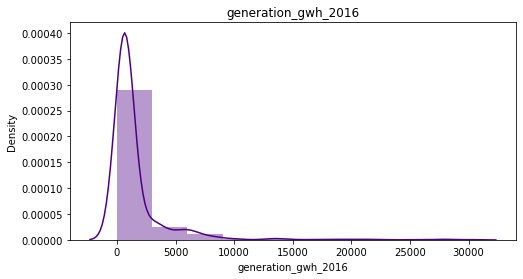

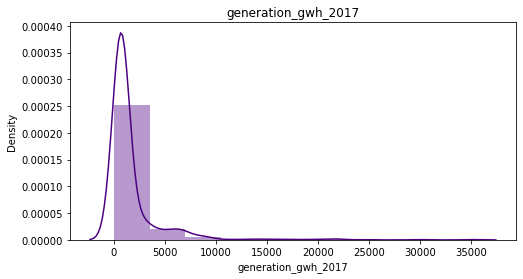

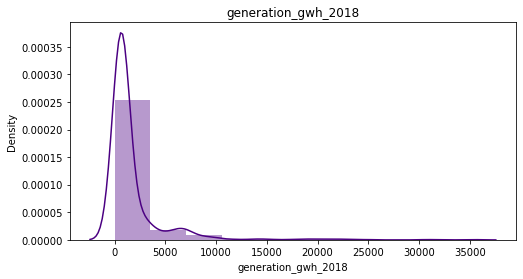

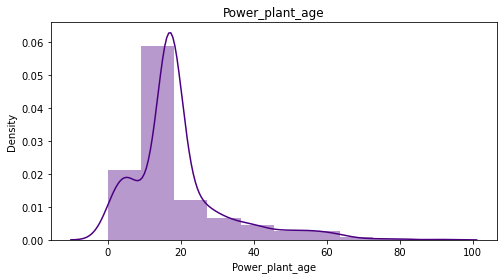

In [27]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

Expect for latitude column all other columns are right skewed.

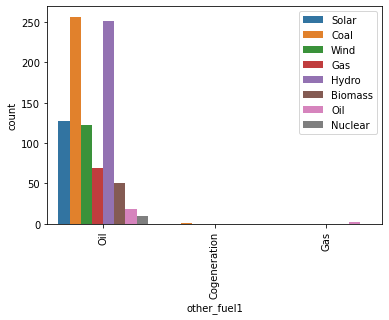

In [28]:
sns.countplot(x='other_fuel1',hue ='primary_fuel',data = df)
plt.xticks(rotation =90)
plt.legend(loc='upper right')
plt.show()

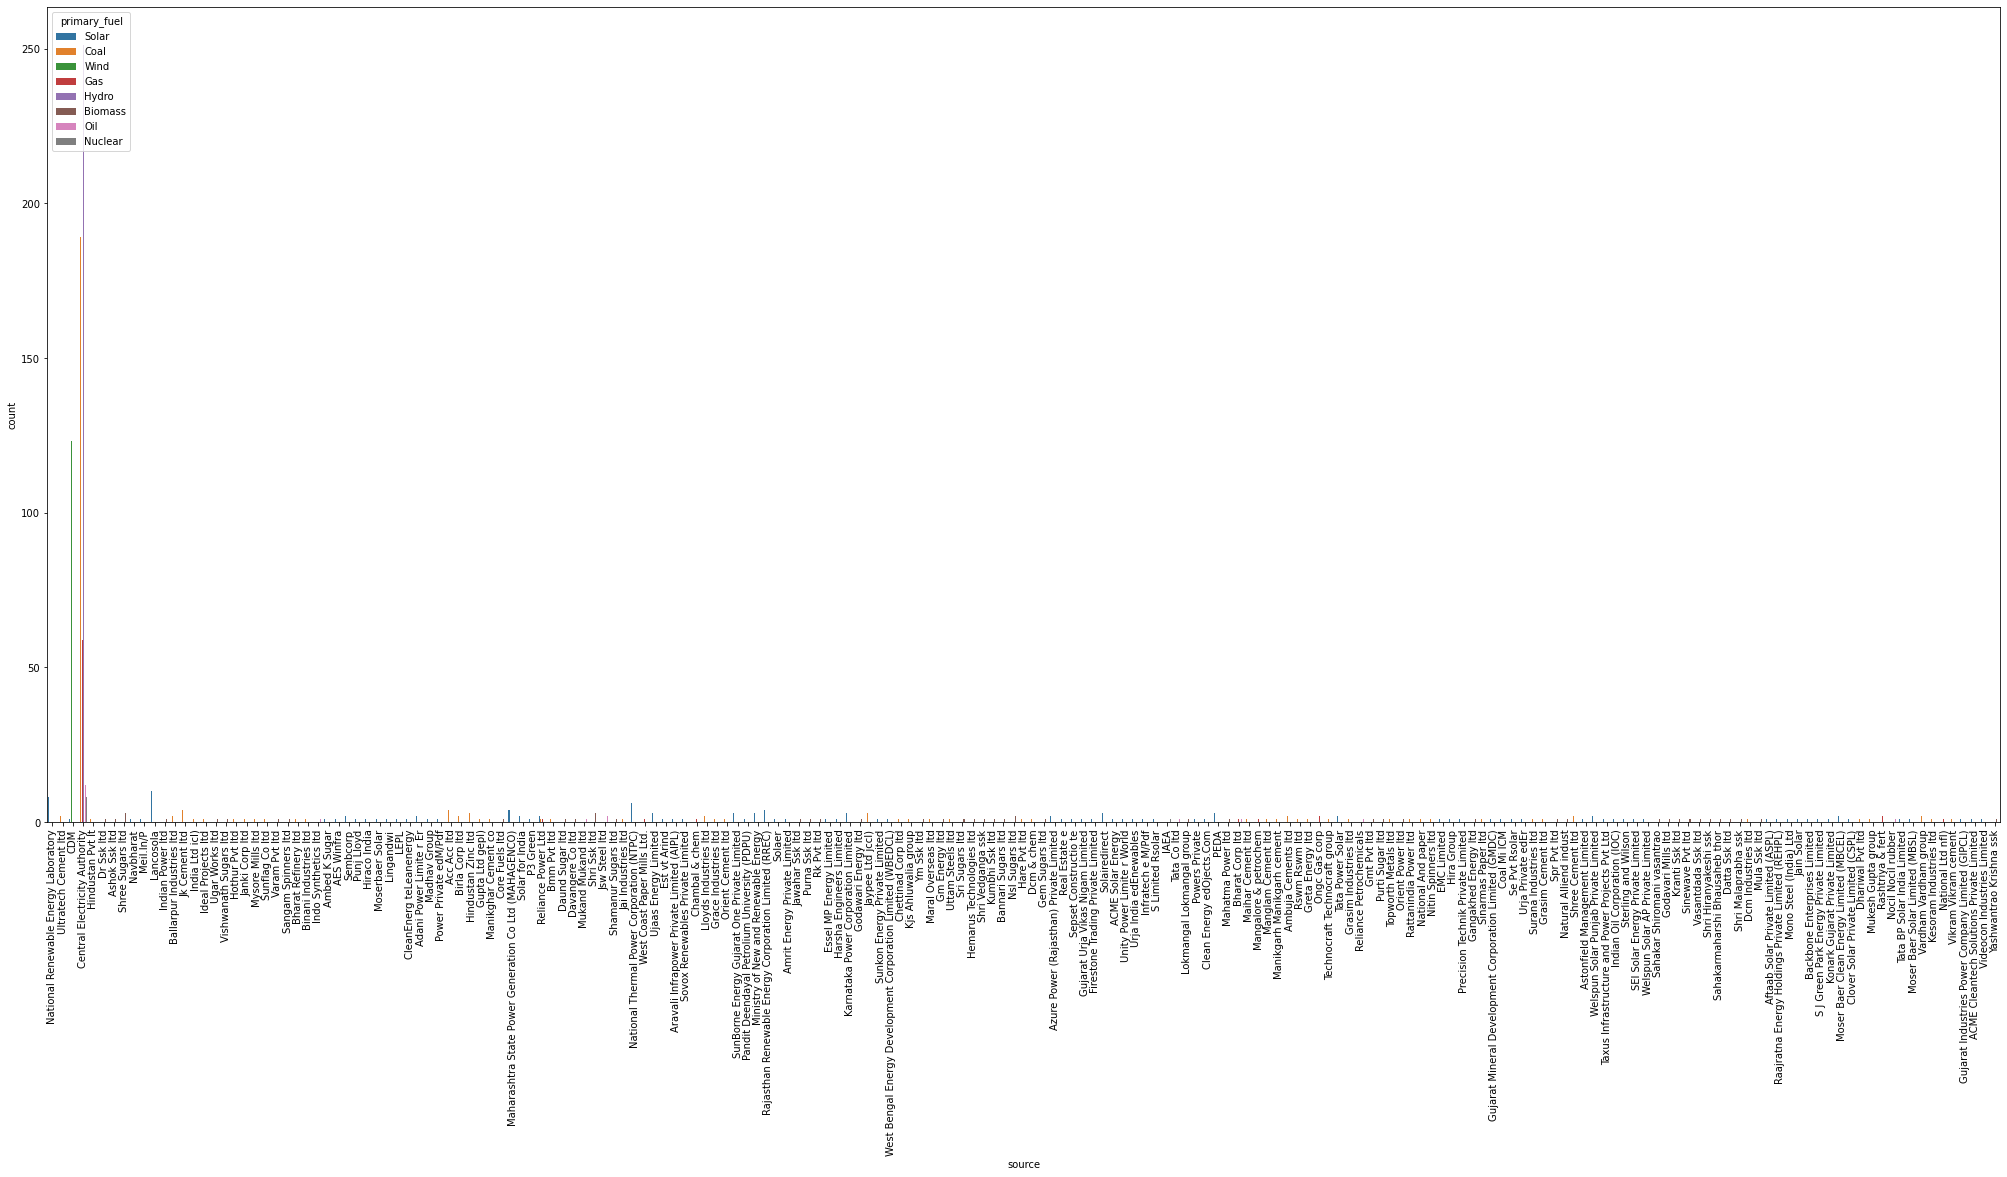

In [91]:
fig = plt.figure(figsize=(35,15))
sns.countplot(x='source',hue ='primary_fuel',data = df)
plt.xticks(rotation =90)
plt.show()

Most of the power comes from central electricity authority only.

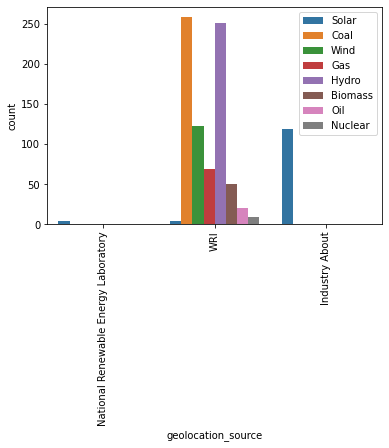

In [29]:
sns.countplot(x='geolocation_source',hue ='primary_fuel',data = df)
plt.xticks(rotation =90)
plt.legend(loc='upper right')
plt.show()

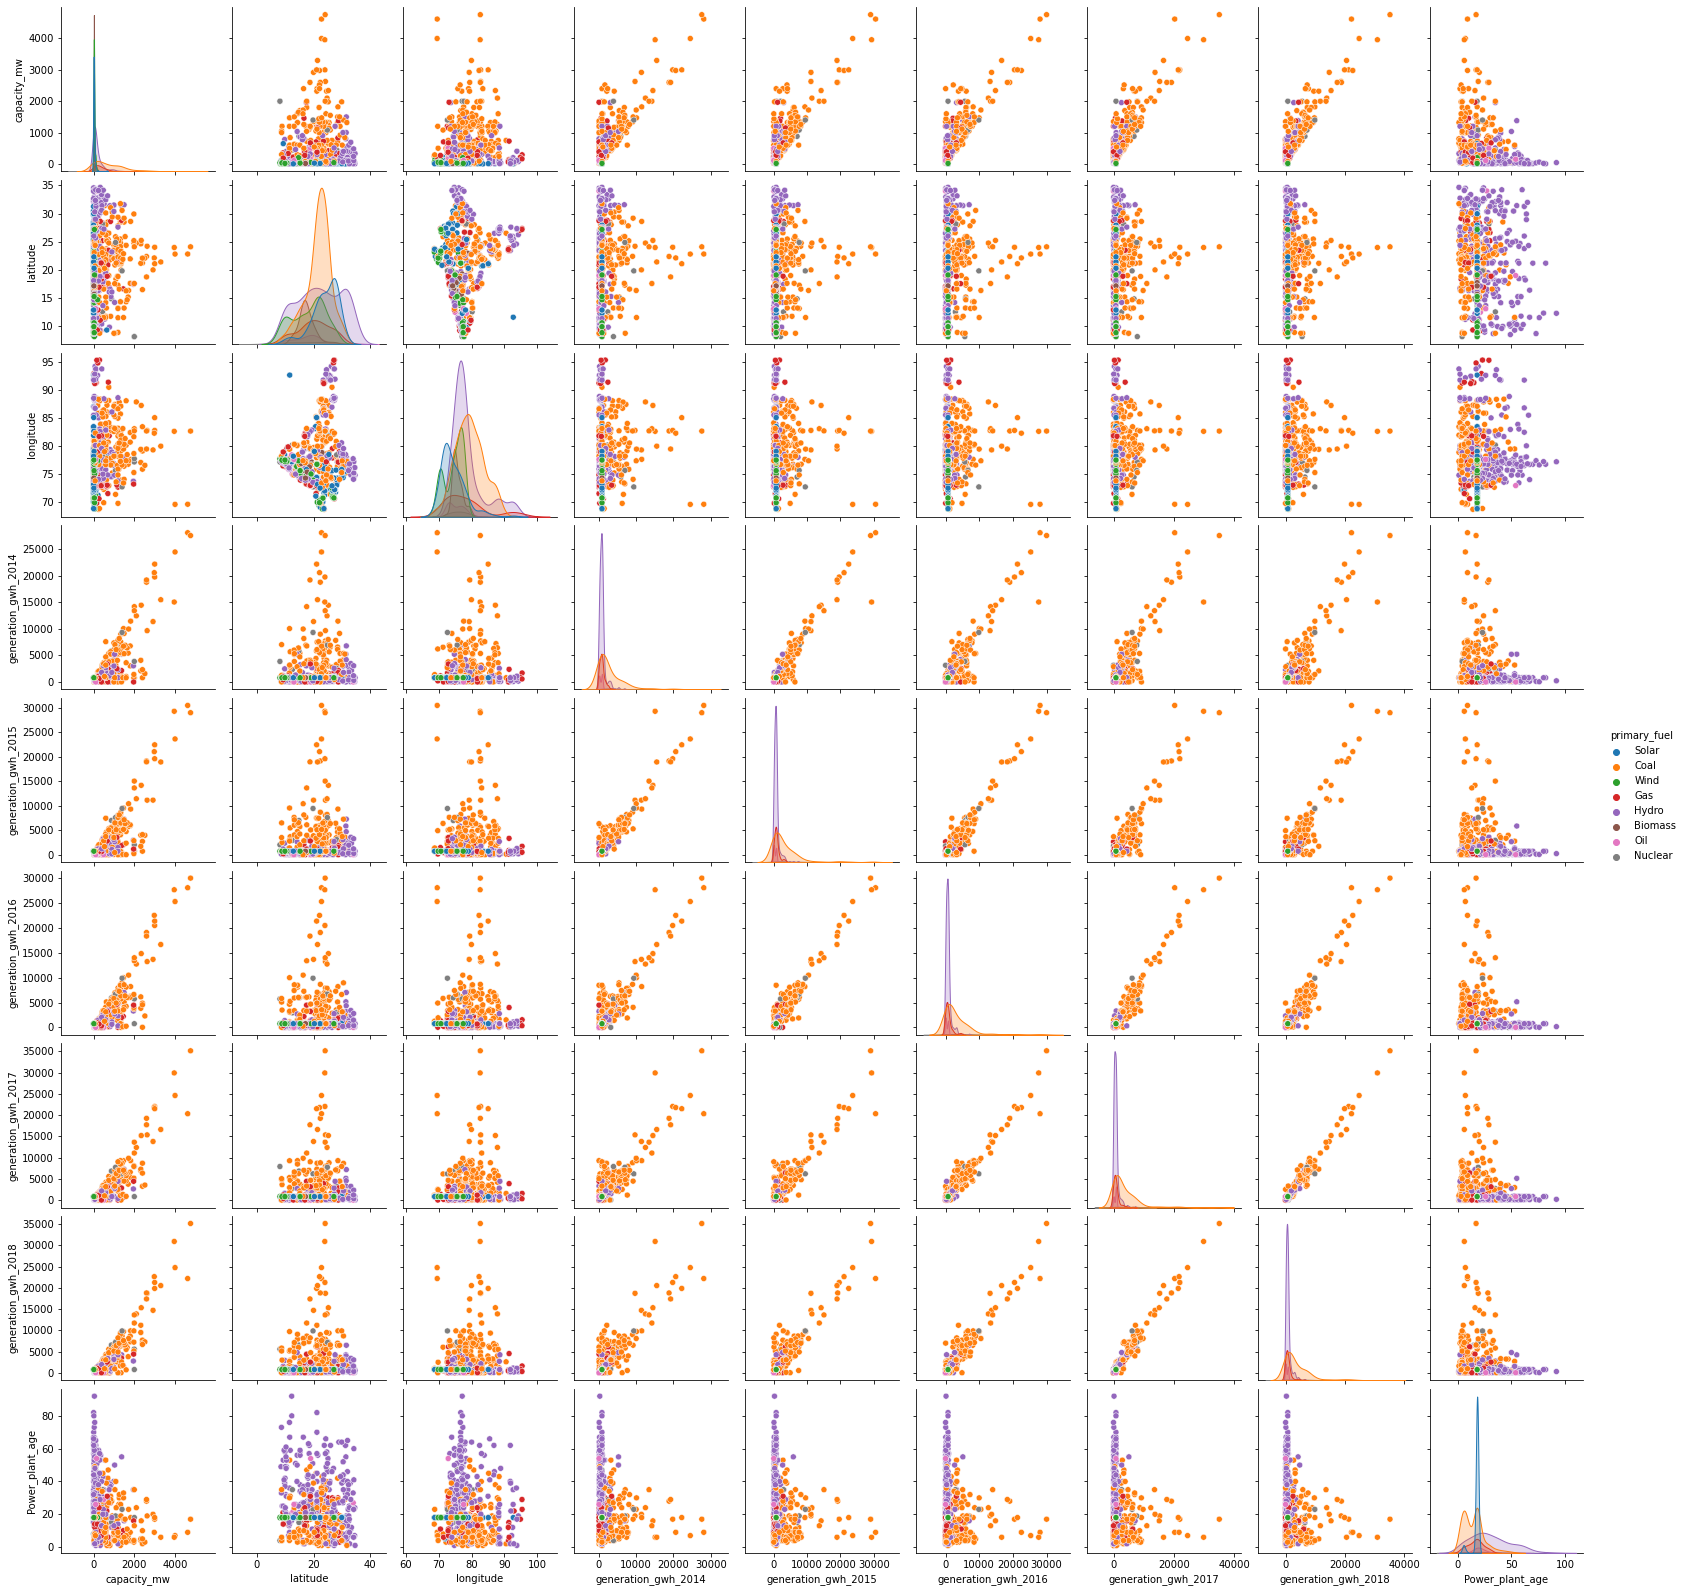

In [97]:
#pair ploting for df
sns.pairplot(df,hue="primary_fuel")

* Above is the pair plot for having Fuel_type as target.There are some extreme outliers present in the dataset.


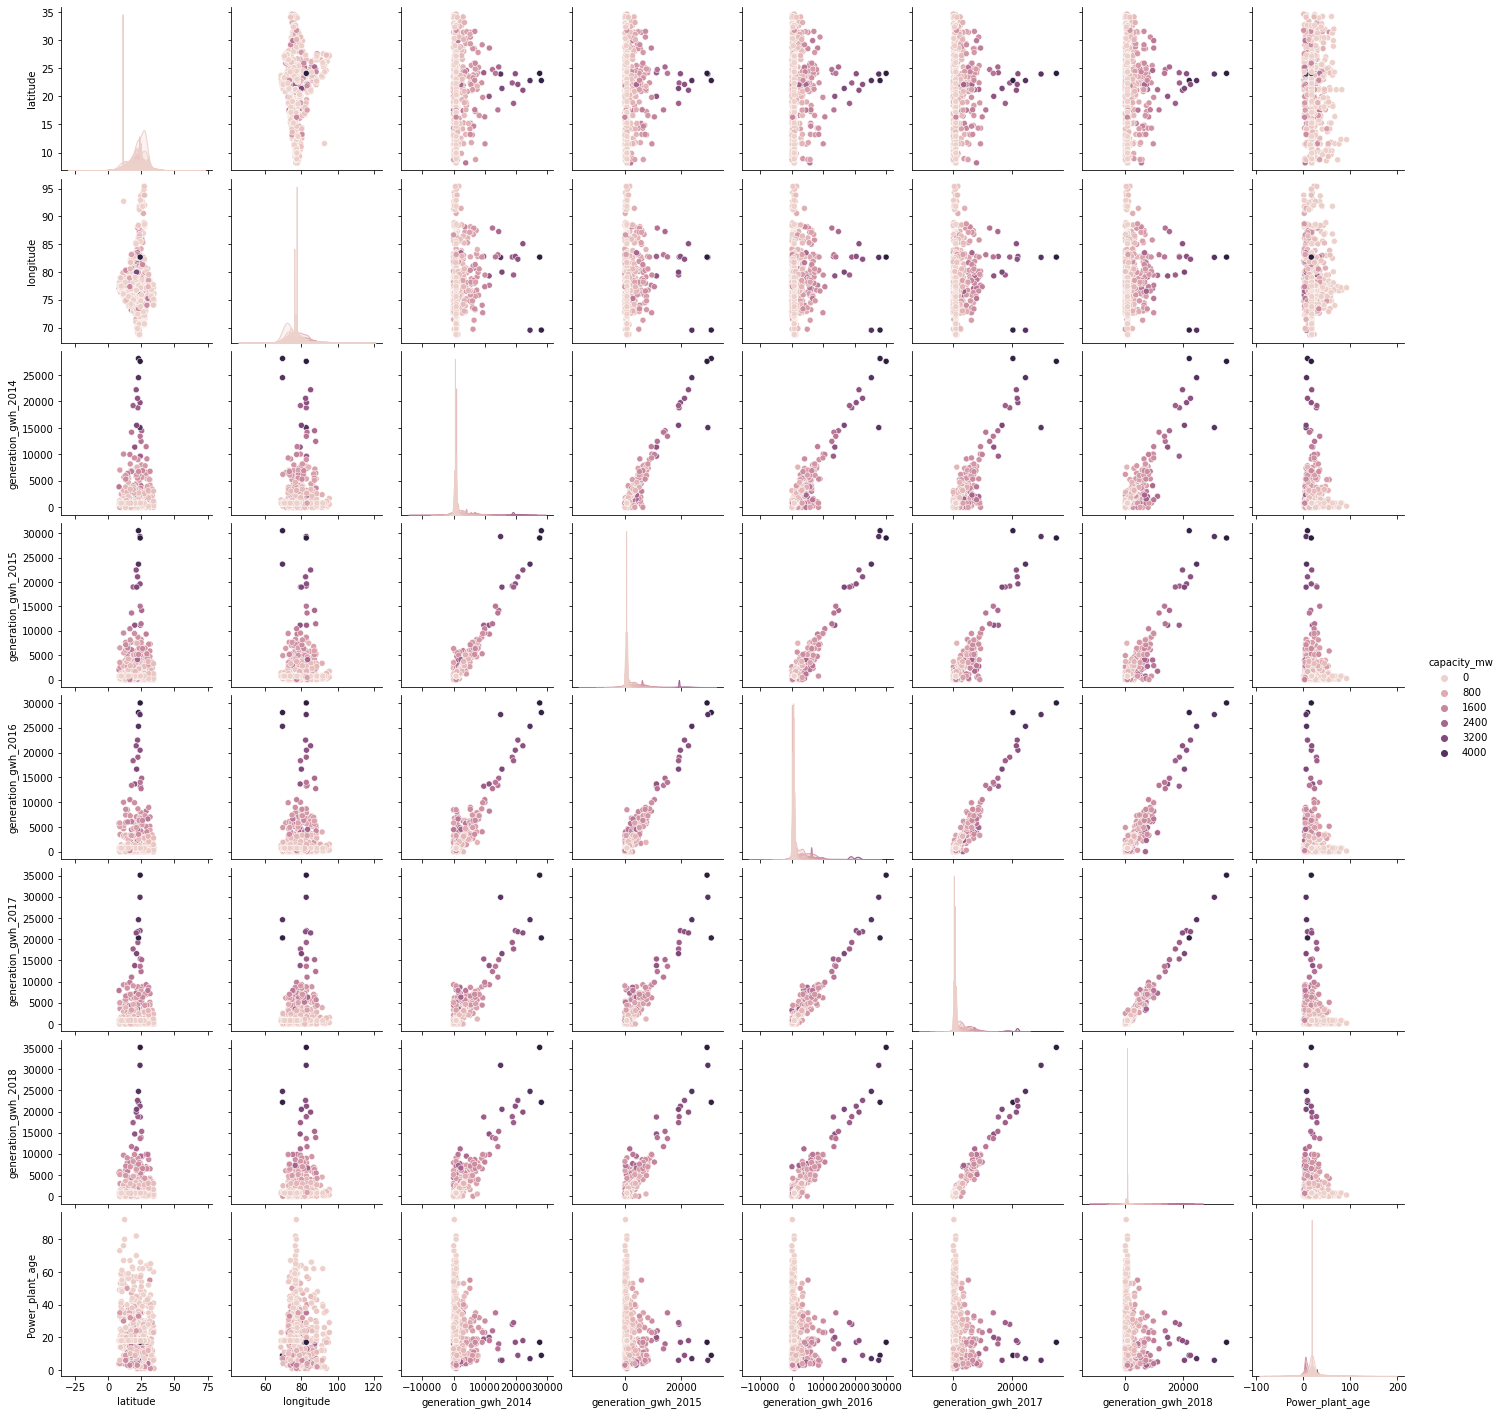

In [98]:
#pair ploting for df
sns.pairplot(df,hue="capacity_mw")

Above is the pairplot for having capacity_mw as target.Here also there are extreme outliers.
* If the age of power plant is more than the power generation will be less.
* older plants have less capacity than the recently started plants.
* There is a linear relationship between generation of 2013 & 2014, and density of data points are more in between o to 5000 which means less capacity power plants are more in number.
* Here also i can see a linear relationship between generation of 2015 & 2016.

### Data Cleaning:

### Checking for outliers:

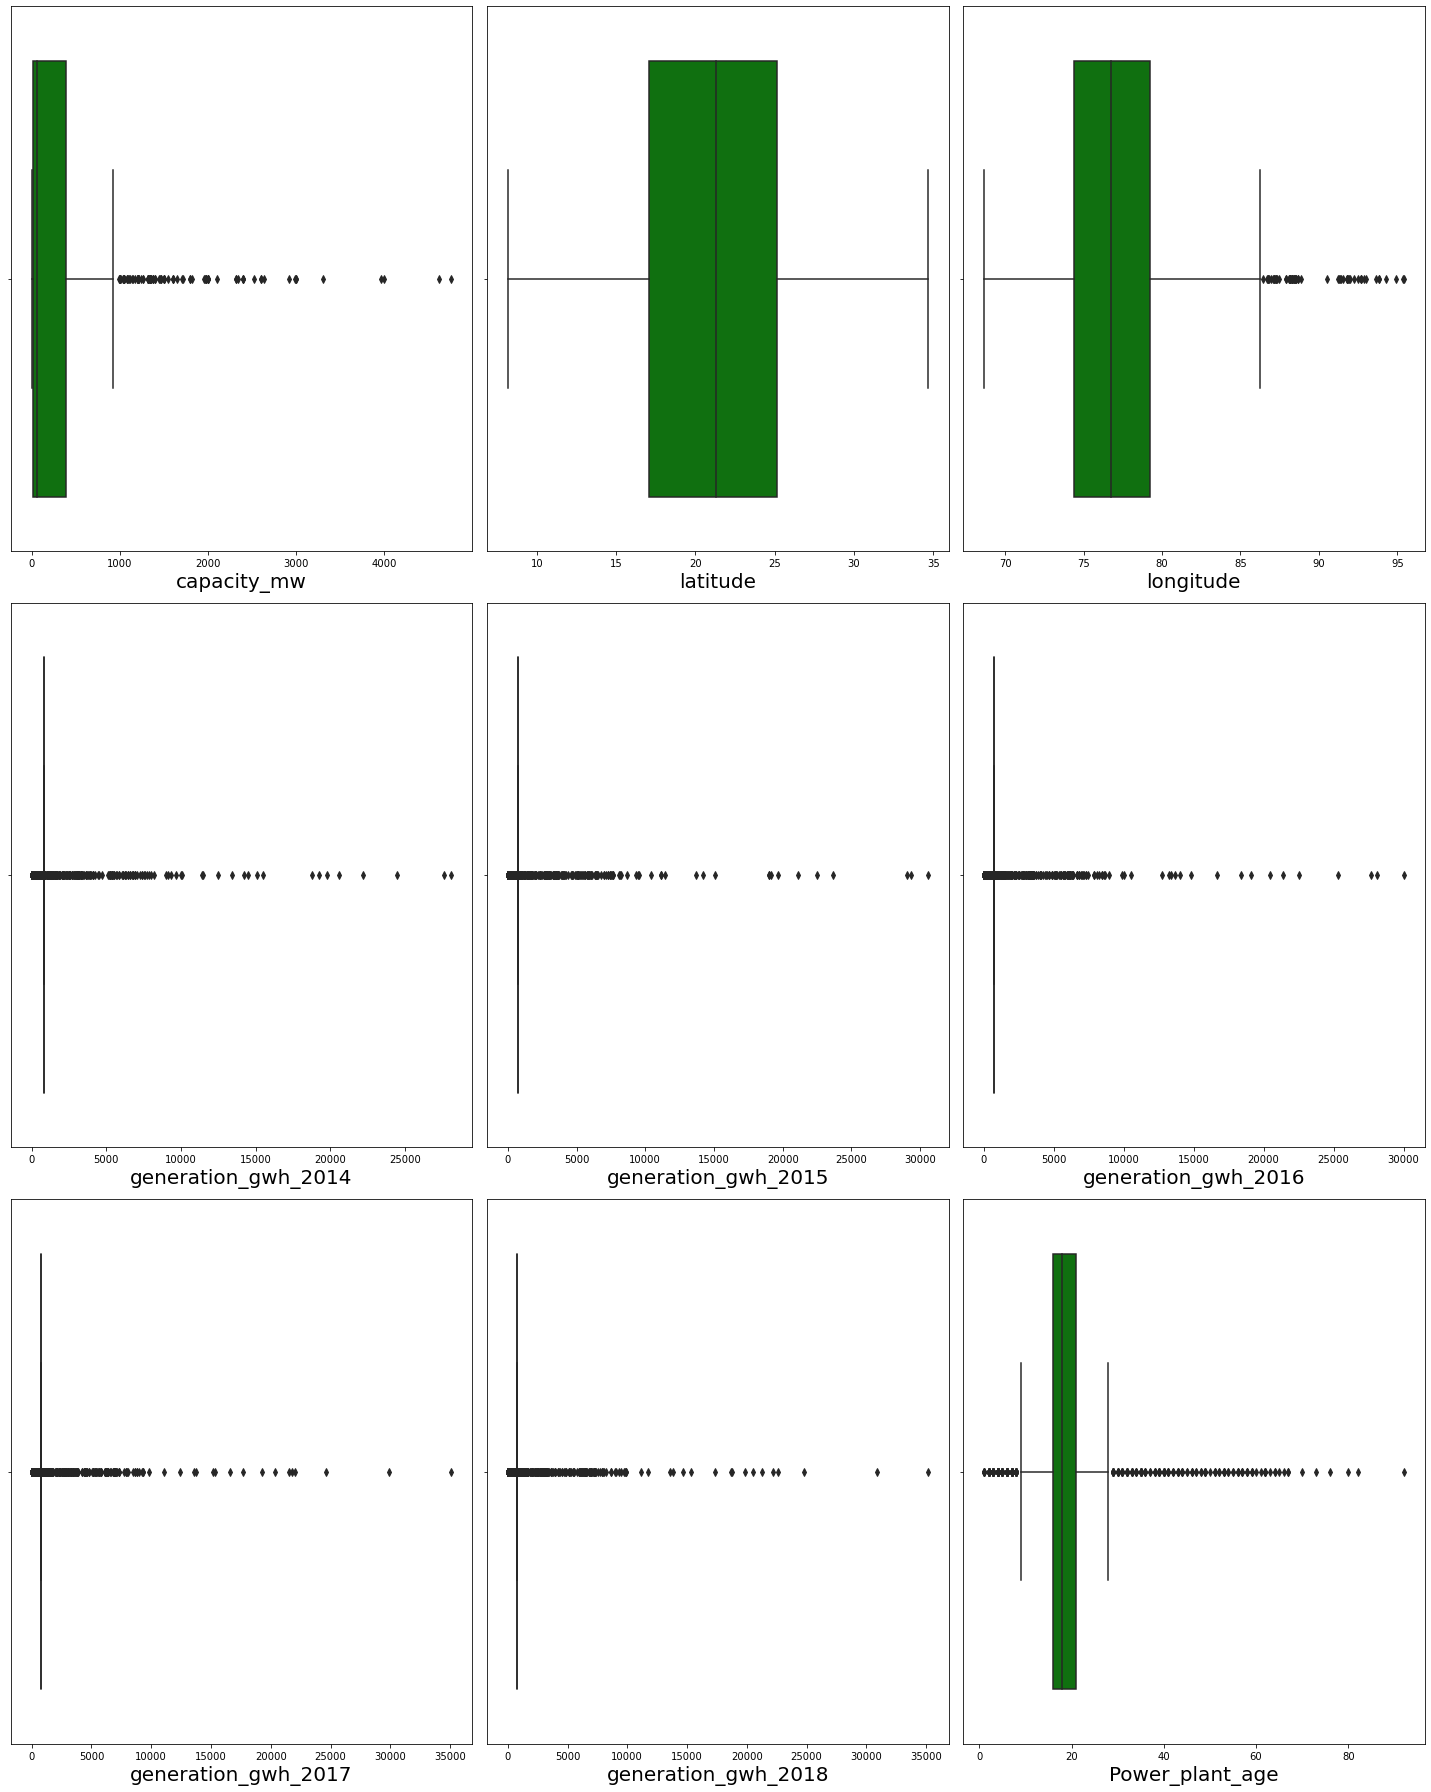

In [99]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in
* longitude
* generation_gwh_2013
* generation_gwh_2014
*generation_gwh_2015
*generation_gwh_2016
*generation_gwh_2017
*generation_gwh_2018
*Power_plant_age
*Since capacity_mw is my target no need to remove outliers in that column.

### Removing outliers:

Zscore Method:

In [30]:
#Features having outliers
features=df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [31]:
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [32]:
#Checking shape of new dataset
df_new.shape

(851, 13)

In [33]:
#Checking dataloss
Dataloss = (((908-852)/908)*100)
Dataloss

6.167400881057269

Using Zscore i have 6.17% data loss.Which is less than 10%.But still let me have a look into IQR method also.

In [34]:
cols=['primary_fuel','other_fuel1','geolocation_source','source']


In [35]:
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

In [36]:
df_new[cols].head()

,primary_fuel,other_fuel1,geolocation_source,source
0,6,2,1,109
1,1,2,2,174
2,7,2,2,21
3,2,2,2,22
4,1,2,2,22


Using label encoder i have encoded the categorical columns.

In [37]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


### Checking the correlation using heat map:

In [38]:
df_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

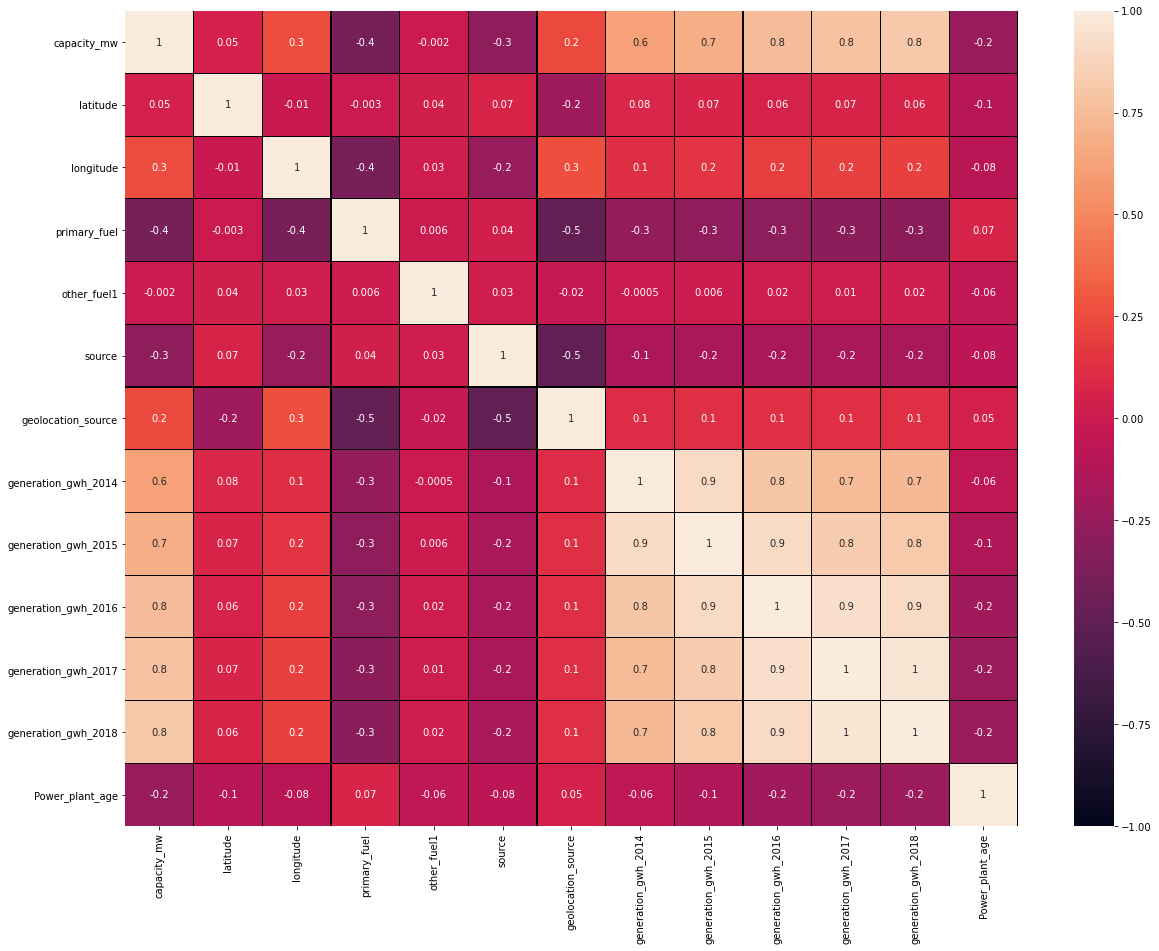

In [113]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10})
plt.yticks(rotation=0);

Above are the correlations of features.I can consider that if capacity_mw is my target then

latitude and other_fuel1 are very less correlated with capacity_mw.
If i consider Fuel_type as target then

* latitude, other_fuel1, source and Power_plant_age are very less correlated with Fuel_type.
If i consider the independent features then

* geolocation_gwh_2013 and geolocation_gwh_2014 are highly correlated.
* geolocation_gwh_2013 and geolocation_gwh_2015 are highly correlated.
* geolocation_gwh_2014 and geolocation_gwh_2015 are highly correlated.
* geolocation_gwh_2015 and geolocation_gwh_2016 are highly correlated.
* geolocation_gwh_2016 and geolocation_gwh_2014 are highly correlated.
* geolocation_gwh_2017 and geolocation_gwh_2015 are highly correlated.
* capacity_mw is highly correlated with geolocation_gwh_2016.
* capacity_mw is highly correlated with geolocation_gwh_2017.

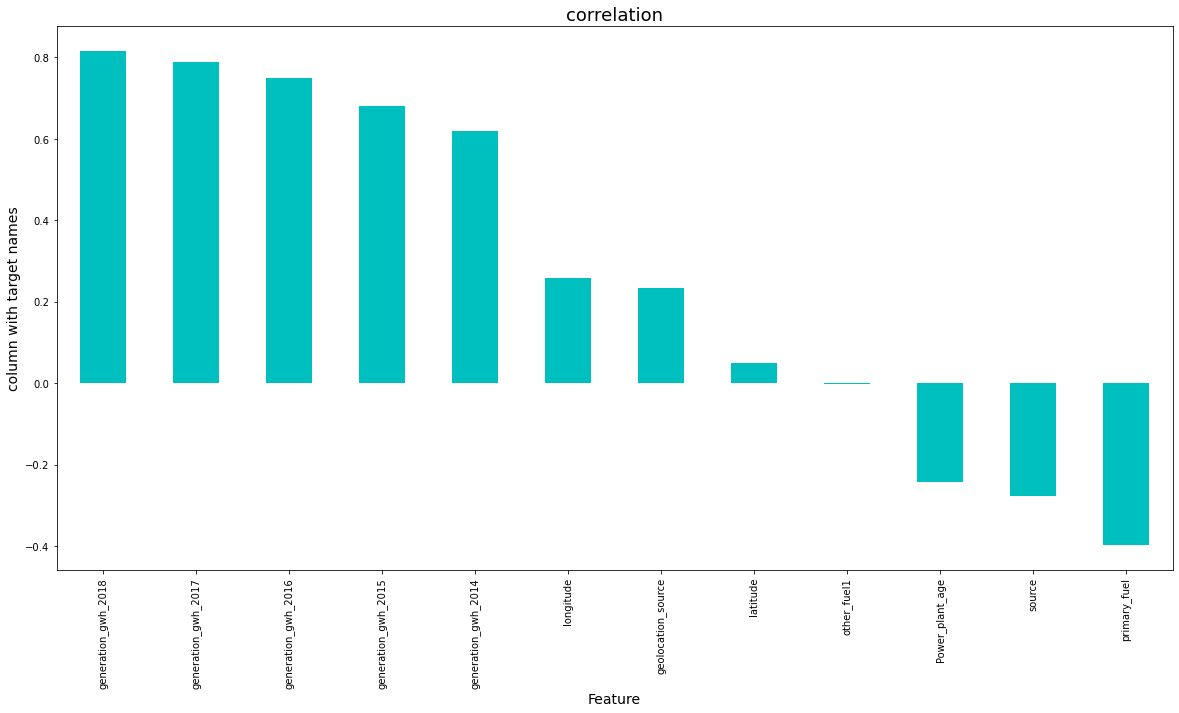

In [114]:
plt.figure(figsize=(20,10))
df_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Latitude and other_fuel1 is very less correlated with Fuel_type1.So i can drop them.

In [39]:
#Droping less correlated column
df_new = df_new.drop(["other_fuel1"],axis=1)
df_new = df_new.drop(["latitude"],axis=1)

In [40]:
df_new.head(3)

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.20545,817.97725,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.20545,817.97725,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.20545,817.97725,751.644375,17.0


In [41]:
df_new.shape

(851, 11)

### i) Prediction and model building for capacity_mw:

First let me predict capacity_mw and since capacity_mw is a continuous column so i have to use regression models.

Let me consider the data set df_new for this perticular prediction and i'll remove skewness from independent columns.

### Separating features and label:

In [42]:
x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

Assigned y as target variable and x as remaining features.

### Checking for skewness:

In [43]:
#Checking for skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

There is skewness in all column except primary_fuel .geolocation_source and source are categorical columns so no need to remove skewness.

**Removing skewness using yeo-johnson:**

In [44]:
#list of skewed features
skew_fea=['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

In [45]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [46]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

In [47]:
#Checking skewness after removing skewness
x[skew_fea].skew()

longitude             -0.000128
generation_gwh_2018    0.133691
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
Power_plant_age        0.043734
dtype: float64

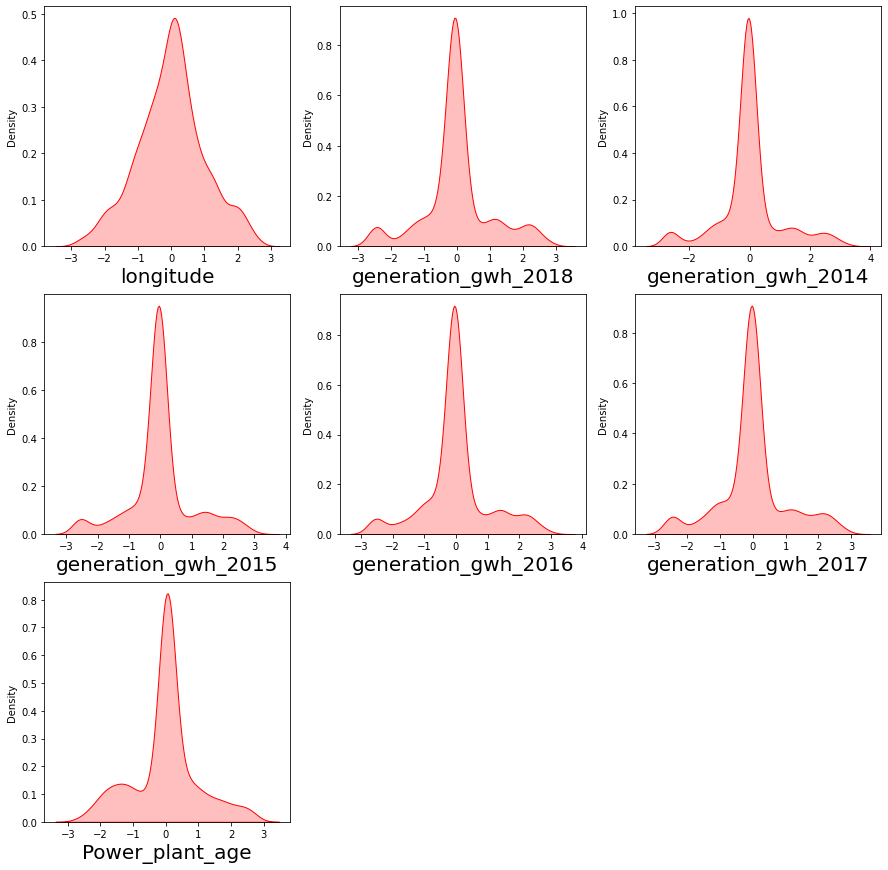

In [48]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

skewness is removed.

### Scaling the data using standard scaler:

In [49]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

### Using VIF to remove multicolinearity:

In [50]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.309948,longitude
1,1.682645,primary_fuel
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


Since all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

**Finding Best Random State and Accuracy:**

In [135]:
maxAccu=0
maxRS=0
for i in range(1,851):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8760541559216514  on Random_state  671


In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

**i) DecisionTreeRegressor:**

In [139]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6802989610793919
mean_squared_error: 59212.393295218746
mean_absolute_error: 114.547515625
root_mean_squared_error: 243.33596794394936


**ii) RandomForestRegressor:**

In [140]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8767414088035451
mean_squared_error: 22828.941074387647
mean_absolute_error: 78.02894181549823
root_mean_squared_error: 151.0924917869437


**iii) Gradient Boosting:**

In [141]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.862263687098337
mean_squared_error: 25510.3854466732
mean_absolute_error: 82.36296029664281
root_mean_squared_error: 159.71970901135901


**iv) KNN:**

In [142]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8405344896716322
mean_squared_error: 29534.888427218753
mean_absolute_error: 85.6520625
root_mean_squared_error: 171.85717450027727


**Cross validation score:**

In [143]:
#cross validation to check the accuracy score
print('cross validation score of DecisionTreeRegressor model = ', cross_val_score(DTR,X,y,cv=5).mean())
print('cross validation score of RandomForestRegressor model = ', cross_val_score(RFR,X,y,cv=5).mean())
print('cross validation score of Gradient Boosting model = ', cross_val_score(GBR,X,y,cv=5).mean())
print('cross validation score of KNN model = ', cross_val_score(knn,X,y,cv=5).mean())

cross validation score of DecisionTreeRegressor model =  0.5872367934312764
cross validation score of RandomForestRegressor model =  0.7872579621759839
cross validation score of Gradient Boosting model =  0.7508183170057758
cross validation score of KNN model =  0.7243940528473077


Above are the cross validation scores of DTR, RFR, GBR and KNN.

And the difference between model r2_score and cross validation score is less for RandomForestRegressor so RFR is my best model and i have to tune it using RFR parameters.

### Hyper parameter tuning:

In [144]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [145]:
parameter = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [146]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [147]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [148]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [149]:
Final_mod=RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=8,max_features='log2',n_estimators=400,)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 87.37652966045434
mean_squared_error: 23380.152063920123
mean_absolute_error: 78.6274769150932
RMSE value: 152.9056966365875


RandomForestRegressor gives 87.37% as r2_score which is good to save the model.

### Saving the model:

In [150]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Capacity_MW.pkl")

['Capacity_MW.pkl']

### ii) Model building for Fuel_type:

Target as primary_fuel - classification model.

### Separating features and label:

In [52]:
x_1 = df_new.drop("primary_fuel",axis=1)
y_1 = df_new["primary_fuel"]

**Checking for skewness:**

In [54]:
#to Check for skewness
x_1.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

There is skewness in all column. geolocation_source and source are categorical columns so no need to remove skewness.

**Removing skewness using yeo-johnson:**

In [61]:
#list of skewed features
skew_feat=['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

Taking all the columns with skewness as a list with variable skew_feat.

In [59]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [62]:
#Removing skewness using yeo-johnson
x_1[skew_feat] = scaler.fit_transform(x_1[skew_feat].values)

Using yeo-johnson i have removed the skewness.

In [63]:
# to check skewness after removing skewness
x_1[skew_feat].skew()

capacity_mw            0.016303
longitude             -0.000128
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

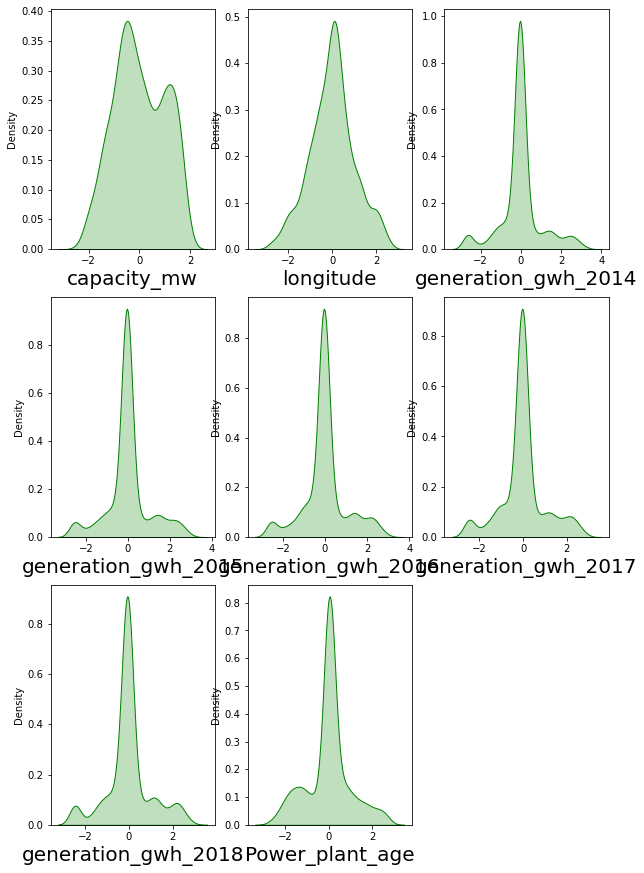

In [64]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in x_1[skew_feat]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_1[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

skewness is completly removed.

In [65]:
# scaling data using standard scalers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(x_1), columns=x_1.columns)

**Using VIF to remove multicolinearity:**

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


As all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

**Balancing the target variable using oversampling:**

In [67]:
y_1.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_1, y_1 = SM.fit_resample(X_1,y_1)

In [69]:
# Checking the value counts again
y_1.value_counts()

7    238
6    238
5    238
4    238
3    238
2    238
1    238
0    238
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

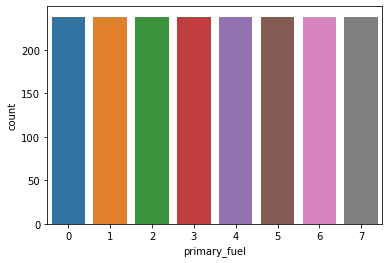

In [70]:
# Visualizing the data after oversampling
sns.countplot(y_1)

Now the target column is balanced.

**Finding Best Random State and Accuracy:**

In [71]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.tree  import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9003496503496503  on Random_state  72


In [73]:
x_train,x_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

Created train and test data.

Classification Algorithms:

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

**i) DecisionTreeClassifier:**

In [75]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.9038461538461539
Confusion Matrix: [[75  0  6  0  0  0  0  0]
 [ 4 40  9  5  7  1  0  0]
 [ 1  5 49  5  1  3  0  0]
 [ 0  3  1 63  0  0  0  0]
 [ 0  0  0  0 78  0  0  0]
 [ 0  3  0  1  0 64  0  0]
 [ 0  0  0  0  0  0 84  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        81
           1       0.78      0.61      0.68        66
           2       0.75      0.77      0.76        64
           3       0.85      0.94      0.89        67
           4       0.91      1.00      0.95        78
           5       0.94      0.94      0.94        68
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00        64

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.90      0.90      0.90       572



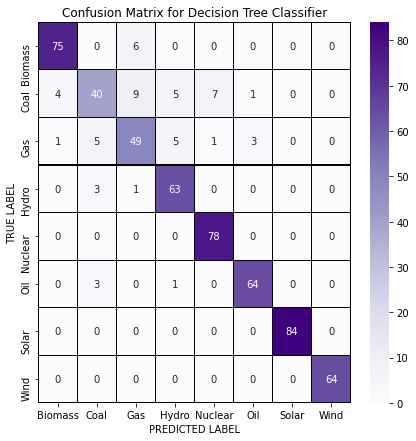

In [76]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

**ii) RandomForestClassifier:**

In [77]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrf=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9248251748251748
Confusion Matrix: [[78  3  0  0  0  0  0  0]
 [ 5 45  5  6  3  2  0  0]
 [ 1  6 53  2  0  2  0  0]
 [ 0  3  1 61  2  0  0  0]
 [ 0  0  0  0 78  0  0  0]
 [ 0  1  0  1  0 66  0  0]
 [ 0  0  0  0  0  0 84  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        81
           1       0.78      0.68      0.73        66
           2       0.90      0.83      0.86        64
           3       0.87      0.91      0.89        67
           4       0.94      1.00      0.97        78
           5       0.94      0.97      0.96        68
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00        64

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.92      0.92      0.92       572



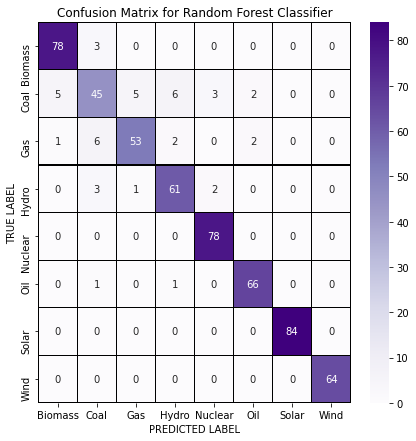

In [78]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

**iii) SupportVectorClassifier:**

In [79]:
SV=SVC()
SV.fit(x_train,y_train)
predsv=SV.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8216783216783217
Confusion Matrix: [[69  0  0  0  0  0  0 12]
 [ 9 39  5  2  6  3  0  2]
 [ 2  5 36  4  1 14  0  2]
 [ 0  4  6 42  1  0  0 14]
 [ 0  0  0  0 78  0  0  0]
 [ 1  2  0  0  0 60  0  5]
 [ 0  0  0  0  0  0 84  0]
 [ 0  0  2  0  0  0  0 62]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        81
           1       0.78      0.59      0.67        66
           2       0.73      0.56      0.64        64
           3       0.88      0.63      0.73        67
           4       0.91      1.00      0.95        78
           5       0.78      0.88      0.83        68
           6       1.00      1.00      1.00        84
           7       0.64      0.97      0.77        64

    accuracy                           0.82       572
   macro avg       0.82      0.81      0.81       572
weighted avg       0.83      0.82      0.82       572



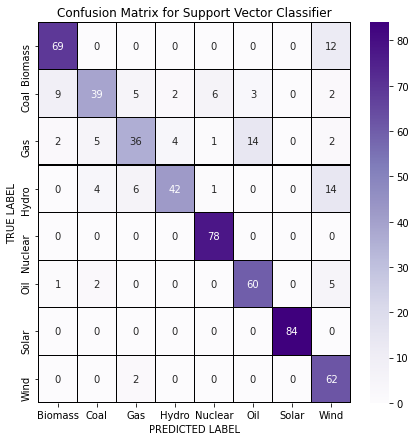

In [80]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier model using confusion matrix.

**iv) K-Neighbor Classifier:**

In [81]:
knn=KNN()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8758741258741258
Confusion Matrix: [[79  1  0  0  0  0  0  1]
 [10 34  8  6  5  2  0  1]
 [ 3  1 51  1  0  7  0  1]
 [ 0  6  4 49  0  1  0  7]
 [ 0  0  2  0 76  0  0  0]
 [ 2  0  0  0  0 65  0  1]
 [ 0  0  0  0  0  0 84  0]
 [ 0  0  0  0  0  1  0 63]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        81
           1       0.81      0.52      0.63        66
           2       0.78      0.80      0.79        64
           3       0.88      0.73      0.80        67
           4       0.94      0.97      0.96        78
           5       0.86      0.96      0.90        68
           6       1.00      1.00      1.00        84
           7       0.85      0.98      0.91        64

    accuracy                           0.88       572
   macro avg       0.87      0.87      0.86       572
weighted avg       0.87      0.88      0.87       572



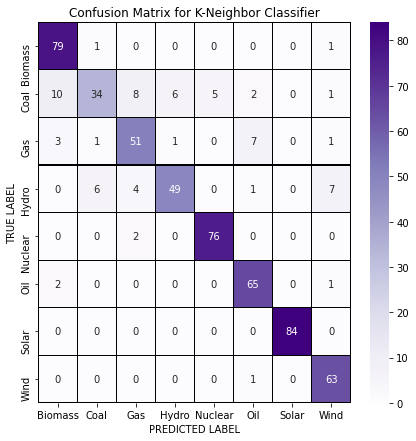

In [82]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

**Cross Validation Cross:**

In [83]:
#Importing library
from sklearn.model_selection import cross_val_score

In [84]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X_1,y_1,cv=5).mean())

0.8676529907445779


In [85]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X_1,y_1,cv=5).mean())

0.9222682690979417


In [86]:
# cv score for Support Vector  Classifier
print(cross_val_score(SV,X_1,y_1,cv=5).mean())

0.796206658378229


In [87]:
# cv score for KNN Classifier
print(cross_val_score(knn,X_1,y_1,cv=5).mean())

0.8555712114933002


Above are the cross validation scores of DTC,RFC,SVC,and KNN.

The difference between  Model accuracy and cross validation score is best found in KNN .

**Hyper Parameter tuning:**

In [88]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [89]:
parameter = {'n_neighbors':[1,2,3,4,5,6],     #parameters for KNN classifier
             'weights':['uniform','distance'],
             'leaf_size':[10,100,1000],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

Giving parameters of KNN.

In [90]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

Running grid search CV for KNN.

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100, 1000],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [92]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [93]:
Final1_mod=KNN(algorithm='auto',leaf_size=10, n_neighbors=1, weights='uniform')
Final1_mod.fit(x_train,y_train)
pred=Final1_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

90.38461538461539


After tunning the model with best parameters i got 90.38% accuracy which is good.!!!

**ROC AUC Curve:**

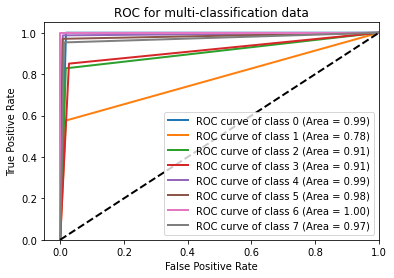

In [94]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(Final1_mod)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

Above is the roc curves of all models.And my best model is KNN.

**Saving the model:**

In [95]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final1_mod,"Fuel_type.pkl")

['Fuel_type.pkl']